In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_csv("../data/A_Z Handwritten Data.csv")

In [3]:
arr = df.iloc[:,1:].to_numpy()
labels = df.iloc[:,:1].to_numpy().reshape(len(df))

data_train, data_test, labels_train, labels_test = train_test_split(arr, labels, test_size=0.20, random_state=42)

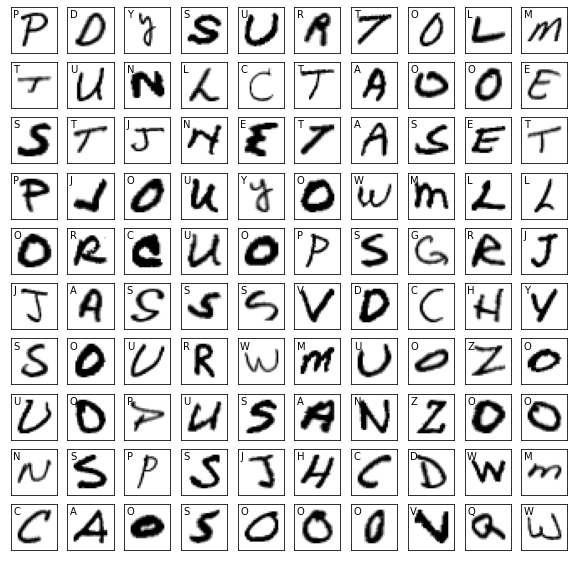

In [4]:
data_train = data_train.reshape(len(labels_train),28,28)
data_test = data_test.reshape(len(labels_test),28,28)

labels_dict = {0:"A", 1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H",8:"I",9:"J",10:"K",
               11:"L",12:"M",13:"N",14:"O",15:"P",16:"Q",17:"R",18:"S", 19:"T",20:"U",21:"V",22:"W",23:"X",24:"Y",25:"Z",}

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for row in ax:
  for col in row:
    i = np.random.randint(data_train.shape[0])
    col.imshow(data_train[i], cmap='gray_r')
    col.text(1,6,labels_dict[labels_train[i]],fontsize=10)
    col.set_xticks(())
    col.set_yticks(())

plt.show()

In [5]:
data_train = data_train/255
data_test = data_test/255

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(data_train, labels_train, epochs=10)

Epoch 1/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.2772 - accuracy: 0.9238 0s - l
Epoch 2/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.1236 - accuracy: 0.9656
Epoch 3/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.0950 - accuracy: 0.9728
Epoch 4/10
9312/9312 [==============================] - 19s 2ms/step - loss: 0.0802 - accuracy: 0.9766
Epoch 5/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.0691 - accuracy: 0.9795
Epoch 6/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.0616 - accuracy: 0.9817 0s - loss: 0.0616 - accuracy: 
Epoch 7/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.0554 - accuracy: 0.9833 0s - loss: 0.0553 - accuracy
Epoch 8/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.0501 - accuracy: 0.9848
Epoch 9/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.0462 - accuracy: 0.9859
Epoch 

In [7]:
test_loss, test_acc = model.evaluate(data_test, labels_test, verbose = 1)

2328/2328 [==============================] - 3s 1ms/step - loss: 0.0781 - accuracy: 0.9799


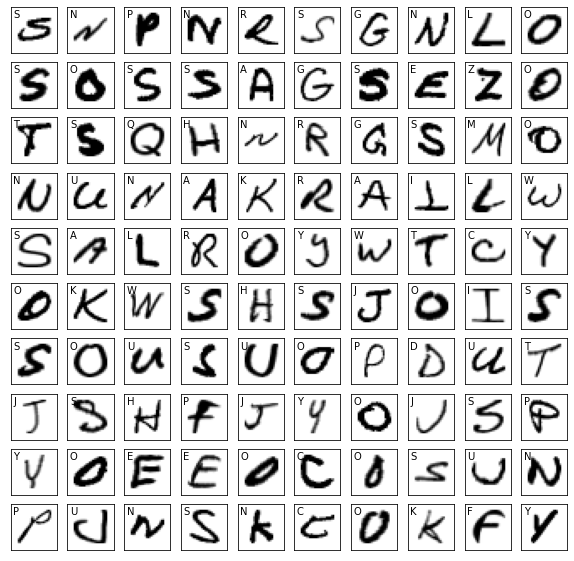

In [8]:
predictions = model.predict(data_test)

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for row in ax:
  for col in row:
    i = np.random.randint(labels_test.shape[0])
    col.imshow(data_test[i], cmap='gray_r')
    col.text(1,6,labels_dict[np.argmax(predictions[i])],fontsize=10)
    col.set_xticks(())
    col.set_yticks(())

plt.show()

In [9]:
model.save('model.h5')